# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file = '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
import csv

sign_dict = {}
with open('signnames.csv', 'r') as csvfile:
    next(csvfile)
    rd = csv.reader(csvfile)
    for row in rd:
        sign_dict[int(row[0])] = row[1]

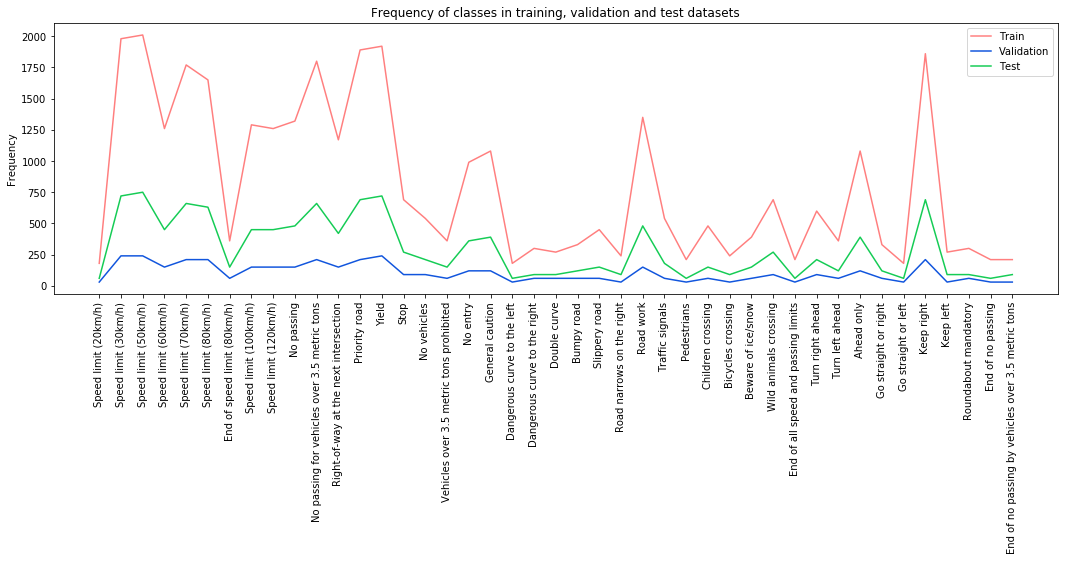

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

idx, count_train = np.unique(y_train, return_counts=True)
idx2, count_valid = np.unique(y_valid, return_counts=True)
idx3, count_test = np.unique(y_test, return_counts=True)

signs = [sign_dict[x] for x in idx]

ind = np.arange(len(idx))

fig, ax = plt.subplots(figsize=(18,5))
rects_train = ax.plot(ind, count_train, color="red", alpha=0.5)
rects_valid = ax.plot(ind, count_valid, color="#1155dd")
rects_test = ax.plot(ind, count_test, color="#15cc55")

ax.set_ylabel('Frequency')
ax.set_xticks(ind)
ax.set_xticklabels(signs, rotation=90)
ax.set_title('Frequency of classes in training, validation and test datasets')

ax.legend((rects_train[0], rects_valid[0], rects_test[0]), ('Train', 'Validation', 'Test'))

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
import cv2

def normalize(img):
    return cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train = normalize(X_train)
X_test = normalize(X_test)

X_train, y_train = shuffle(X_train, y_train)

In [7]:
more_X_train = []
more_y_train = []

more2_X_train = []
more2_y_train = []

new_counts_train = count_train
for i in range(n_train):
    if(new_counts_train[y_train[i]] < 3000):
        for j in range(3):
            dx, dy = np.random.randint(-1.7, 1.8, 2)
            M = np.float32([[1, 0, dx], [0, 1, dy]])
            dst = cv2.warpAffine(X_train[i], M, (X_train[i].shape[0], X_train[i].shape[1]))
            dst = dst[:,:,None]
            more_X_train.append(dst)
            more_y_train.append(y_train[i])

            random_higher_bound = np.random.randint(27, 32)
            random_lower_bound = np.random.randint(0, 5)
            points_one = np.float32([[0,0],[32,0],[0,32],[32,32]])
            points_two = np.float32([[0, 0], [random_higher_bound, random_lower_bound],\
                                     [random_lower_bound, 32],[32, random_higher_bound]])
            M = cv2.getPerspectiveTransform(points_one, points_two)
            dst = cv2.warpPerspective(X_train[i], M, (32,32))
            more2_X_train.append(dst)
            more2_y_train.append(y_train[i])
            
            tilt = np.random.randint(-12, 12)
            M = cv2.getRotationMatrix2D((X_train[i].shape[0]/2, X_train[i].shape[1]/2), tilt, 1)
            dst = cv2.warpAffine(X_train[i], M, (X_train[i].shape[0], X_train[i].shape[1]))
            more2_X_train.append(dst)
            more2_y_train.append(y_train[i])
            
            new_counts_train[y_train[i]] += 2
    
more_X_train = np.array(more_X_train)
more_y_train = np.array(more_y_train)
more_X_train = np.reshape(more_X_train, (np.shape(more_X_train)[0], 32, 32, 3))
X_train = np.concatenate((X_train, more_X_train), axis=0)
y_train = np.concatenate((y_train, more_y_train), axis=0)

more2_X_train = np.array(more_X_train)
more2_y_train = np.array(more_y_train)
more2_X_train = np.reshape(more2_X_train, (np.shape(more2_X_train)[0], 32, 32, 3))
X_train = np.concatenate((X_train, more2_X_train), axis=0)
y_train = np.concatenate((y_train, more2_y_train), axis=0)

X_train = np.concatenate((X_train, X_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

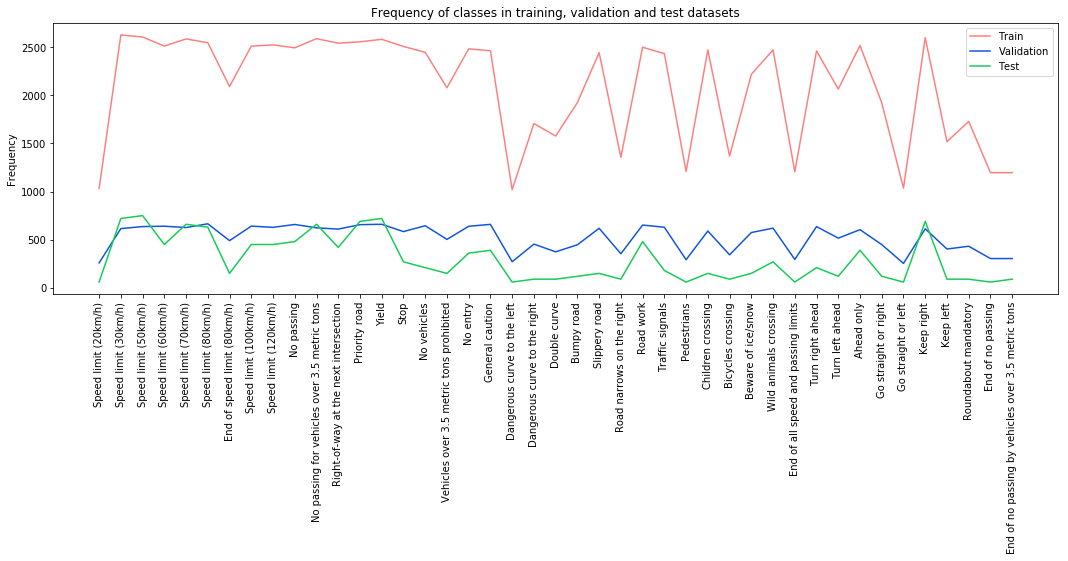

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

idx, count_train = np.unique(y_train, return_counts=True)
idx2, count_valid = np.unique(y_valid, return_counts=True)
idx3, count_test = np.unique(y_test, return_counts=True)

fig, ax = plt.subplots(figsize=(18,5))
rects_train = ax.plot(ind, count_train, color="red", alpha=0.5)
rects_valid = ax.plot(ind, count_valid, color="#1155dd")
rects_test = ax.plot(ind, count_test, color="#15cc55")

ax.set_ylabel('Frequency')
ax.set_xticks(ind)
ax.set_xticklabels(signs, rotation=90)
ax.set_title('Frequency of classes in training, validation and test datasets')

ax.legend((rects_train[0], rects_valid[0], rects_test[0]), ('Train', 'Validation', 'Test'))

plt.show()

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 60
BATCH_SIZE = 100

In [10]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 14x14x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 5x5x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(conv2)
    
    # Flatten conv3. Input = 1x1x400. Output = 400.
    fc0   = flatten(conv3)
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    fc0 = tf.concat([fc0, layer2flat], 1)
    
    # Dropout
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    fc1_W  = tf.Variable(tf.truncated_normal(shape=(800, n_classes), mean = mu, stddev = sigma))
    fc1_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc0, fc1_W) + fc1_b
    
    return logits


In [11]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y,  n_classes)
keep_prob = tf.placeholder(tf.float32)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.00097

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [13]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    validation_accuracy_figure = []
    train_accuracy_figure = []
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_figure.append(validation_accuracy)
        
        train_accuracy = evaluate(X_train, y_train)
        train_accuracy_figure.append(train_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.780
Validation Accuracy = 0.778

EPOCH 2 ...
Train Accuracy = 0.894
Validation Accuracy = 0.890

EPOCH 3 ...
Train Accuracy = 0.935
Validation Accuracy = 0.929

EPOCH 4 ...
Train Accuracy = 0.937
Validation Accuracy = 0.932

EPOCH 5 ...
Train Accuracy = 0.952
Validation Accuracy = 0.948

EPOCH 6 ...
Train Accuracy = 0.957
Validation Accuracy = 0.953

EPOCH 7 ...
Train Accuracy = 0.958
Validation Accuracy = 0.954

EPOCH 8 ...
Train Accuracy = 0.955
Validation Accuracy = 0.951

EPOCH 9 ...
Train Accuracy = 0.961
Validation Accuracy = 0.957

EPOCH 10 ...
Train Accuracy = 0.961
Validation Accuracy = 0.958

EPOCH 11 ...
Train Accuracy = 0.962
Validation Accuracy = 0.959

EPOCH 12 ...
Train Accuracy = 0.956
Validation Accuracy = 0.952

EPOCH 13 ...
Train Accuracy = 0.963
Validation Accuracy = 0.959

EPOCH 14 ...
Train Accuracy = 0.964
Validation Accuracy = 0.960

EPOCH 15 ...
Train Accuracy = 0.960
Validation Accuracy = 0.956

EPOCH 16 ...
Train Ac

In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.956


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

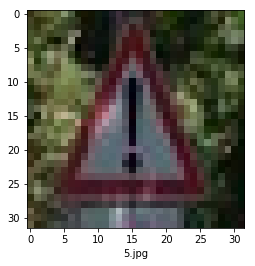

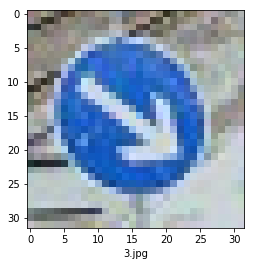

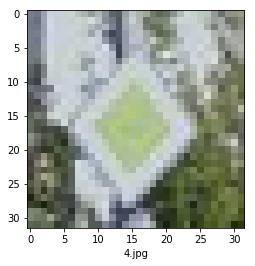

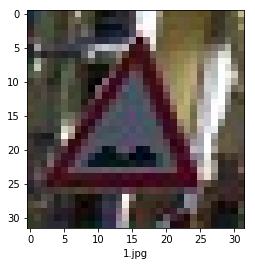

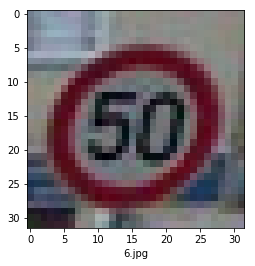

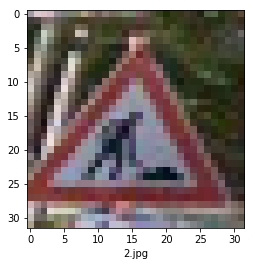

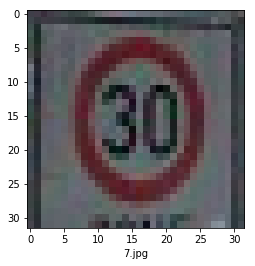

In [16]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
import numpy as np

my_images = []

for i, img in enumerate(os.listdir('test_images/')):
    image = cv2.imread('test_images/' + img)
    my_images.append(image)
    plt.figure()
    plt.xlabel(img)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))



my_images = np.asarray(my_images)

my_images = normalize(my_images)

### Predict the Sign Type for Each Image

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
my_labels = [18, 14, 4, 22, 5, 25, 1]
# Check Test Accuracy

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_images = normalize(my_images)
    output_accuracy = evaluate(my_images, my_labels)
    print("Test Accuracy = {:.3f}".format(output_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.857


### Analyze Performance

INFO:tensorflow:Restoring parameters from ./lenet


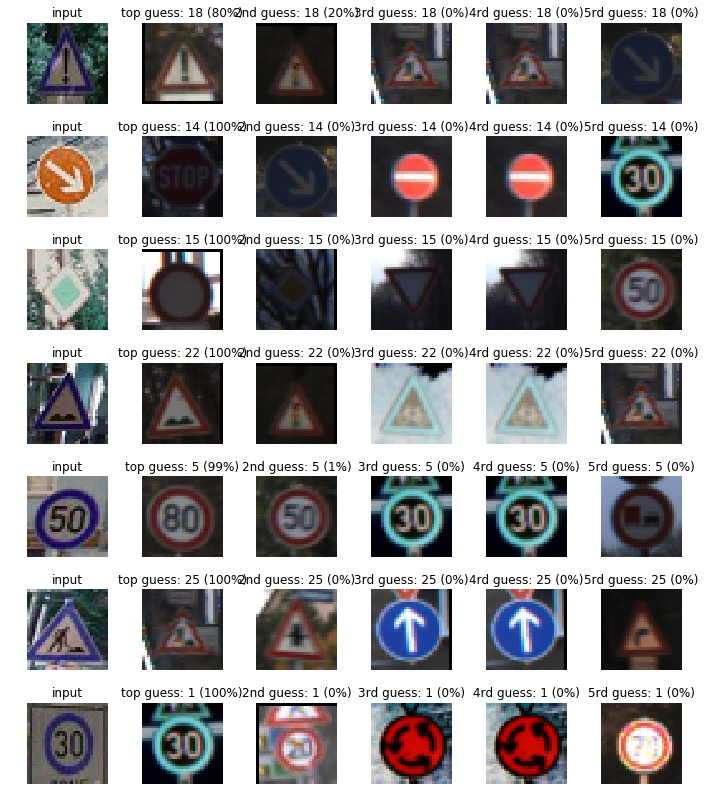

In [22]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(my_images),6, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(my_images):
        axs[6*i].axis('off')
        axs[6*i].imshow(image)
        axs[6*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_train == guess1)[0]
        axs[6*i+1].axis('off')
        axs[6*i+1].imshow(X_train[index1].squeeze())
        axs[6*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_train == guess2)[0]
        axs[6*i+2].axis('off')
        axs[6*i+2].imshow(X_train[index2].squeeze())
        axs[6*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_train == guess3)[0]
        axs[6*i+3].axis('off')
        axs[6*i+3].imshow(X_train[index3].squeeze())
        axs[6*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][2]))
        guess4 = my_top_k[1][i][3]
        index4 = np.argwhere(y_train == guess4)[0]
        axs[6*i+4].axis('off')
        axs[6*i+4].imshow(X_train[index3].squeeze())
        axs[6*i+4].set_title('4rd guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][3]))
        guess5 = my_top_k[1][i][4]
        index5 = np.argwhere(y_train == guess5)[0]
        axs[6*i+5].axis('off')
        axs[6*i+5].imshow(X_train[index5].squeeze())
        axs[6*i+5].set_title('5rd guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][4]))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.


# **Traffic Sign Recognition** 

## Writeup

**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report


## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/481/view) individually and describe how I addressed each point in my implementation.  

---
### Writeup / README

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one. You can submit your writeup as markdown or pdf. You can use this template as a guide for writing the report. The submission includes the project code.

You're reading it! Project code is given above.

### Data Set Summary & Exploration

#### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I used the the inbuilt python functions and numpy library to calculate summary statistics of the traffic

signs data set:
* Number of training examples = 34799
* Number of testing examples = 12630
* Image data shape = (34799, 32, 32, 3)
* Number of unique classes = 43

#### 2. Include an exploratory visualization of the dataset.
The exploratory visualization is shown above.

### Design and Test a Model Architecture

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

First, I decided to normalize the data for better performance of the model. Now in this particular the dataset, the main problem was the lack of generalized data. Mainly some of the classes were higher represented and many classes were less in number. This may cause problem when it comes to training the data. 
So I tried to augument the dataset for better training of the model. At first I thought of using a technique to check the samples of a class and apply augumentation to all the images in that class but it was too computationally expensive even for a GPU workspace. After few hours of struggling, I decided to sparsely augument the data. Now the thing is, I know this is not enough, maybe in near future I shall try to find out a way to make the above process faster.

The new augumented dataset is visualised above.

#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6 					|
| Convolution 5x5	    | 1x1 stride, valid padding, outputs 10x10x16     									|
| RELU					|       										|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16 	    									|
| Convolution 5x5	    | 1x1 stride, valid padding, outputs 1x1x400				|
| RELU					|       										|
| Flatten Layer (a)		|	Convolution (1x1x400 -> 400)  
| Flatten Layer (b)		|	Max pooling (5x5x16 -> 400)
| Concatenate layer 	|	(a) & (b) -> 800
| Dropout				|
| Fully Connected Layer |	Outputs 43 classes

#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

To train the model, I used the following parameters:

 - Epochs: 60
 - Batch Size: 100
 - Optimizer: Adam
 - Learning rate: 0.00097

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

My final model results were:
* training set accuracy of **96.3%**
* validation set accuracy of **96.1%**
* test set accuracy of **95.3%**

I tried using the original LeNet architecture but it turns out, the model performs poorly. Changing the hyperparameters didn't help either. 
Next, I went through [this paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) and found a modified LeNet architecture for better performance. Now the secret was to augument the data as much as possible but as stated above, it took hours to compute. So, I decided to got for the minimal augumentation and apply the modified LeNet architecture and see how it worked. Finally got an accuracy of 95%. Not the best, but does a decent job.

### Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

I used seven German traffic signs that I found on the web are shown above.
The images might be a bit difficult to understand due to the clarity and also since there wasn't enough training data for some classes so the model might have some difficulty.

#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Danger      		| Danger   									| 
| Keep Right    			| Stop 										|
| Yield				| Yield											|
| Bumpy Road	      		| Bumpy Road					 				|
| 50km/h			| 80km/h      							|
| Construction		|	Construction |
| 30km/h			| 30km/h  


The model was able to correctly guess 5 of the  7 traffic signs, which gives an accuracy of 85.7%. This compares favorably to the accuracy on the test set of 95.67% with sparse data.

#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

For the first image, the model is relatively sure that this is a Danger sign (probability of 80%), and the image does contain a stop sign. The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 80%         			| Danger   									| 
| 20%     				| Traffic 										|
| 0%					| Construction											|
| 0%      			| Construction					 				|
| 0%				    | Keep Right      							|
